In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import sklearn
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, roc_curve, roc_auc_score, precision_recall_curve, confusion_matrix, recall_score


# 1. EDA

In [193]:
# get data
df = pd.read_csv("attrition_data_exam.csv")

In [194]:
# learn what data have
df.head()

,Age,Attrition,BusinessTravel,DailyRate($),Department,DistanceFromHome,Education,EducationField,EmployeeNumber#,EnvironmentSatisfaction,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,11,3,0.0,8.0,0.0,1,6.0,4.0,NaN,5.0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,23,4,1.0,10.0,3.0,3,10.0,7.0,1.0,7.0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,3,4,...,15,3,0.0,7.0,3.0,3,0.0,0.0,0.0,0.0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,4,...,11,3,0.0,8.0,3.0,3,8.0,7.0,3.0,0.0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,5,1,...,12,3,1.0,6.0,3.0,3,2.0,2.0,2.0,2.0


## process missing value

In [195]:
# to check whether there is missing value, it have for numcompaines worked#  , stock optionlevel,etc... so it is actually a lot of info is missing 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2418 entries, 0 to 2417
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      2418 non-null   int64  
 1   Attrition                2418 non-null   object 
 2   BusinessTravel           2418 non-null   object 
 3   DailyRate($)             2418 non-null   int64  
 4   Department               2418 non-null   object 
 5   DistanceFromHome         2418 non-null   int64  
 6   Education                2418 non-null   int64  
 7   EducationField           2418 non-null   object 
 8   EmployeeNumber#          2418 non-null   int64  
 9   EnvironmentSatisfaction  2418 non-null   int64  
 10  Gender                   2418 non-null   object 
 11  JobLevel                 2418 non-null   int64  
 12  Job+Role                 2418 non-null   object 
 13  JobSatisfaction          2418 non-null   int64  
 14  MaritalStatus           

In [196]:
# and look into the values I saw employeenumber# I want to check if its just employee index
df['EmployeeNumber#'].tail() 

2413    2414
2414    2415
2415    2416
2416    2417
2417    2418
Name: EmployeeNumber#, dtype: int64

In [197]:
# will drop the column since it is just index
df = df.drop("EmployeeNumber#", axis='columns')


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2418 entries, 0 to 2417
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      2418 non-null   int64  
 1   Attrition                2418 non-null   object 
 2   BusinessTravel           2418 non-null   object 
 3   DailyRate($)             2418 non-null   int64  
 4   Department               2418 non-null   object 
 5   DistanceFromHome         2418 non-null   int64  
 6   Education                2418 non-null   int64  
 7   EducationField           2418 non-null   object 
 8   EnvironmentSatisfaction  2418 non-null   int64  
 9   Gender                   2418 non-null   object 
 10  JobLevel                 2418 non-null   int64  
 11  Job+Role                 2418 non-null   object 
 12  JobSatisfaction          2418 non-null   int64  
 13  MaritalStatus            2418 non-null   object 
 14  MonthlyIncome($)        

to check whether there is missing value, it have for numcompaines worked#  , stock optionlevel,etc... so it is actually a lot of info is missing but it is just few of them missing I will add some not large impact data, others will just drop, since it doesn't miss a lot.

In [199]:
df.groupby('Attrition')['NumCompaniesWorked#'].mean()

Attrition
No     2.684774
Yes    4.258664
Name: NumCompaniesWorked#, dtype: float64

for example, for the numcompaniesworked# there is a large difference for no or yes, let's group by age to see it affects

In [200]:
df.groupby('Age')['NumCompaniesWorked#'].mean() # no major affective on numcompnies worked , will assign by attrition

Age
18    3.321429
19    3.391304
20    3.709677
21    2.666667
22    3.000000
23    3.820513
24    3.000000
25    3.472727
26    2.290909
27    2.421875
28    2.333333
29    3.043478
30    3.179487
31    2.817204
32    3.387097
33    2.753425
34    2.639175
35    2.663265
36    3.538462
37    3.500000
38    3.213333
39    3.531250
40    3.960526
41    3.838710
42    4.422535
43    4.185185
44    3.387755
45    3.623188
46    4.543860
47    4.277778
48    3.718750
49    3.795918
50    3.555556
51    4.660000
52    4.177778
53    3.911111
54    4.263158
55    3.780488
56    4.243243
57    4.727273
58    4.432432
59    4.633333
60    3.444444
Name: NumCompaniesWorked#, dtype: float64

In [201]:
df.groupby('Attrition')['NumCompaniesWorked#'].median()

Attrition
No     2.0
Yes    4.0
Name: NumCompaniesWorked#, dtype: float64

It could see no large difference gonna go with median

In [202]:
df['NumCompaniesWorked#'] = df['NumCompaniesWorked#'].fillna(df.groupby('Attrition')['NumCompaniesWorked#'].transform('median'))

check for stock option

In [203]:
df.groupby('Attrition')['StockOptionLevel'].mean() 

Attrition
No     0.859027
Yes    1.292621
Name: StockOptionLevel, dtype: float64

In [204]:
df.groupby('Attrition')['YearsSinceLastPromotion'].median()  

Attrition
No     1.0
Yes    6.0
Name: YearsSinceLastPromotion, dtype: float64

my understanding for stockoptionlevel is limited so I won't change it

In [205]:
df.groupby('Attrition')['YearsSinceLastPromotion'].mean()  

Attrition
No     2.248980
Yes    6.504657
Name: YearsSinceLastPromotion, dtype: float64

In [206]:
# I will fill it with mean

In [207]:
df['YearsSinceLastPromotion'] = df['YearsSinceLastPromotion'].fillna(df.groupby('Attrition')['YearsSinceLastPromotion'].transform('mean'))

In [208]:
df.groupby('Attrition')['YearsInCurrentRole'].mean()  

Attrition
No     4.498779
Yes    7.814564
Name: YearsInCurrentRole, dtype: float64

In [209]:
df.groupby('Attrition')['YearsInCurrentRole'].median()  

Attrition
No     3.0
Yes    7.0
Name: YearsInCurrentRole, dtype: float64

In [210]:
df['YearsInCurrentRole'] = df['YearsInCurrentRole'].fillna(df.groupby('Attrition')['YearsInCurrentRole'].transform('mean'))

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2418 entries, 0 to 2417
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      2418 non-null   int64  
 1   Attrition                2418 non-null   object 
 2   BusinessTravel           2418 non-null   object 
 3   DailyRate($)             2418 non-null   int64  
 4   Department               2418 non-null   object 
 5   DistanceFromHome         2418 non-null   int64  
 6   Education                2418 non-null   int64  
 7   EducationField           2418 non-null   object 
 8   EnvironmentSatisfaction  2418 non-null   int64  
 9   Gender                   2418 non-null   object 
 10  JobLevel                 2418 non-null   int64  
 11  Job+Role                 2418 non-null   object 
 12  JobSatisfaction          2418 non-null   int64  
 13  MaritalStatus            2418 non-null   object 
 14  MonthlyIncome($)        

In [212]:
#since the stock option is not familiar will just drop the na row from hear

In [213]:
df  = df.dropna()

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2385 entries, 0 to 2417
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      2385 non-null   int64  
 1   Attrition                2385 non-null   object 
 2   BusinessTravel           2385 non-null   object 
 3   DailyRate($)             2385 non-null   int64  
 4   Department               2385 non-null   object 
 5   DistanceFromHome         2385 non-null   int64  
 6   Education                2385 non-null   int64  
 7   EducationField           2385 non-null   object 
 8   EnvironmentSatisfaction  2385 non-null   int64  
 9   Gender                   2385 non-null   object 
 10  JobLevel                 2385 non-null   int64  
 11  Job+Role                 2385 non-null   object 
 12  JobSatisfaction          2385 non-null   int64  
 13  MaritalStatus            2385 non-null   object 
 14  MonthlyIncome($)        

## whether the dataset is balanced?

In [215]:
df.groupby("Attrition").count()

,Age,BusinessTravel,DailyRate($),Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobLevel,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
No,1210,1210,1210,1210,1210,1210,1210,1210,1210,1210,...,1210,1210,1210,1210,1210,1210,1210,1210,1210,1210
Yes,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,...,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175


<AxesSubplot:ylabel='Attrition'>

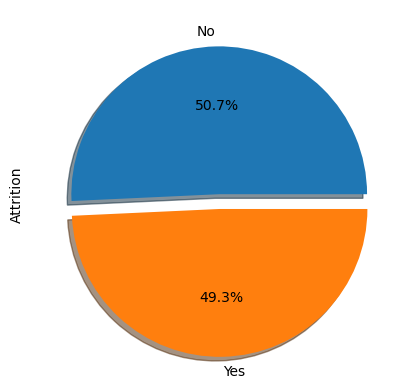

In [216]:
df['Attrition'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True) # very balance

## comment: it is pretty balance

# will check wether the department is balanced and what info are contained there?

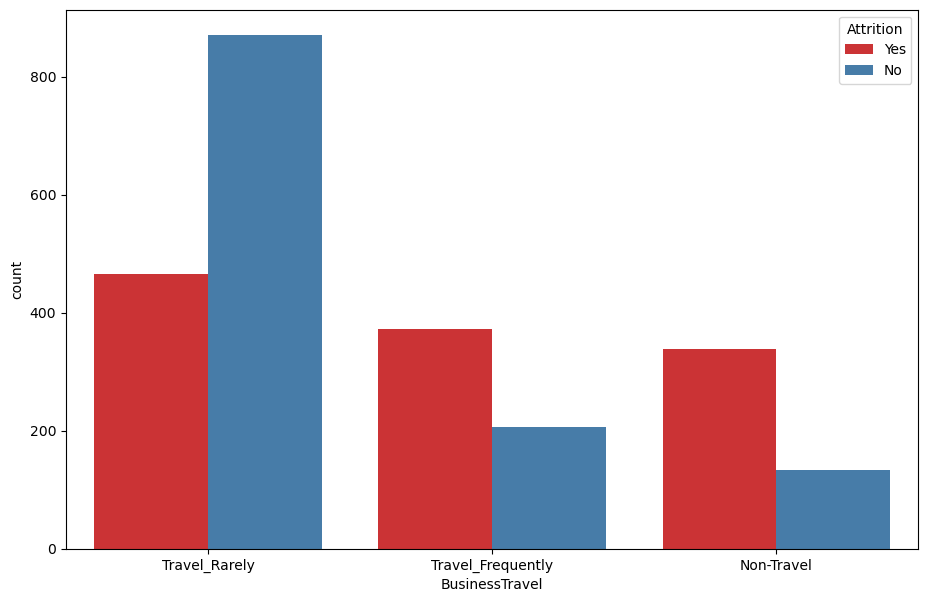

In [217]:
# from here it could found that travel rarely have a high attrition rate
plt.figure(figsize=(11,7))
ax = sns.countplot(x='BusinessTravel',hue='Attrition',data = df,palette='Set1')

In [218]:
#check EducationField in the same way

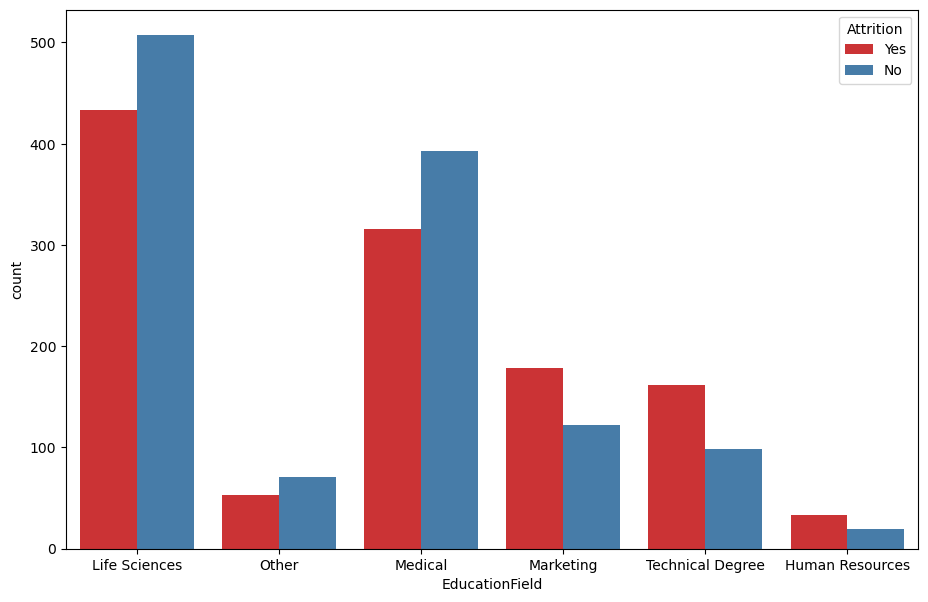

In [219]:
# from here it could found that travel rarely have a high attrition rate
plt.figure(figsize=(11,7))
ax = sns.countplot(x='EducationField',hue='Attrition',data = df,palette='Set1')

In [220]:
#check unique values
for col in df:
  print(df[col].unique())

[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 24 21 53 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 60 18]
['Yes' 'No']
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
[1102  279 1373 ...  875 1007 1430]
['Sales' 'Research & Development' 'Human Resources']
[ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
[2 1 4 3 5]
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
[2 3 4 1]
['Female' 'Male']
[2 1 3 5 4]
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative'
 'Sales Representative' 'Research Director' 'Manager' 'Human Resources']
[4 2 3 1]
['Single' 'Married' 'Divorced']
[5993 5130 2090 ... 3745 2988 4077]
[8. 1. 6. 9. 2. 4. 0. 5. 7. 3.]
['Yes' 'No']
[11 23 15 12 13 20 22 21 17 14 18 16 19 24 25]
[3 4]
[0. 1. 3. 2.]
[ 8. 10.  7.  6. 12.  1. 17.  5.  3. 13.  0. 26. 24. 22.  9. 19.  2. 23.
 14. 15.  4. 29. 28. 21. 25. 20. 

### job + role is a detial version of department,  compare them to see if I should use the detail

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Sales Representative'),
  Text(6, 0, 'Research Director'),
  Text(7, 0, 'Manager'),
  Text(8, 0, 'Human Resources')])

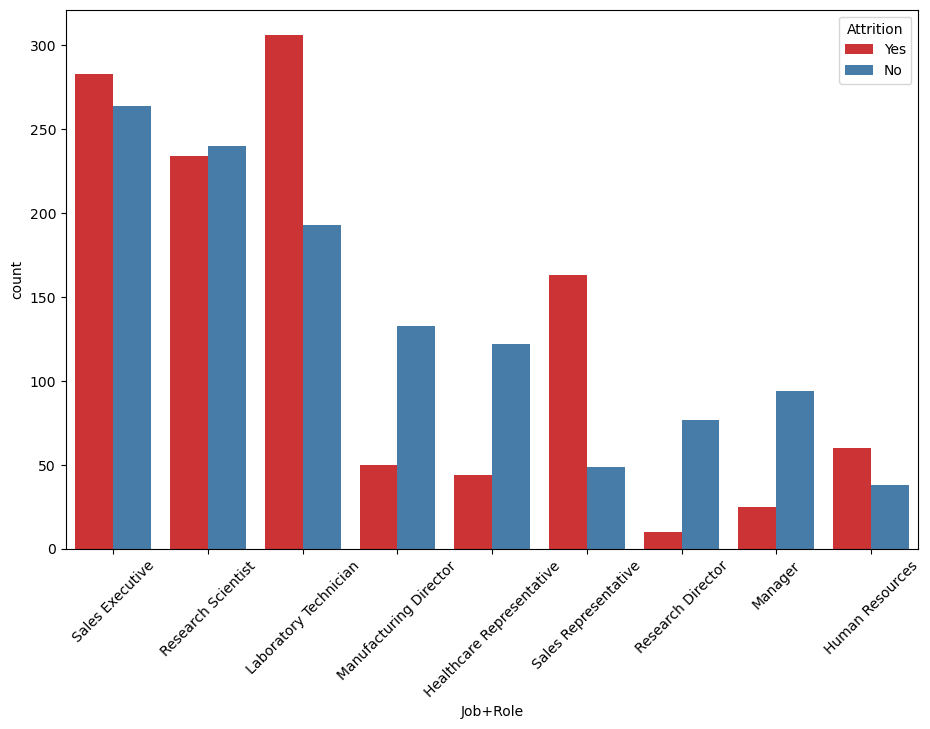

In [221]:
# job + role have so many, check if it really helps
# from here it could found that travel rarely have a high attrition rate
plt.figure(figsize=(11,7))
ax = sns.countplot(x='Job+Role',hue='Attrition',data = df,palette='Set1')
plt.xticks(rotation = 45)

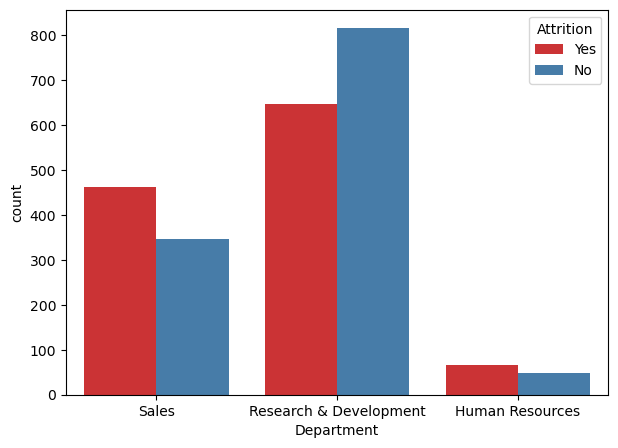

In [222]:
#want to check if Department cvover this info, however the info is toward 
#each job I will use job+role to make prediction first and compare with department prediction
plt.figure(figsize=(7,5))
ax = sns.countplot(x='Department',hue='Attrition',data = df,palette='Set1')

In [223]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate($)', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobLevel', 'Job+Role',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome($)',
       'NumCompaniesWorked#', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [224]:
# will get the number data check on pair plot to see if I could find some clear insights

df1 = df[['Age', 'Attrition','DailyRate($)','DistanceFromHome', "EnvironmentSatisfaction",'JobSatisfaction','MonthlyIncome($)','NumCompaniesWorked#','PercentSalaryHike',
       'PerformanceRating', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]

## now see if numerical variable have correlation
From the heat plot, it shows that 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager' have a high correlation which make sense with longer worked longer correlation, performance rating with  percentage salary hike.

In [226]:
# check if pay rate is different for each job
df.groupby("Job+Role")["MonthlyIncome($)"].mean()

Job+Role
Healthcare Representative     8160.240964
Human Resources               7799.010204
Laboratory Technician         6730.733467
Manager                      15843.621849
Manufacturing Director        8317.234973
Research Director            15333.264368
Research Scientist            6188.993671
Sales Executive               8401.588665
Sales Representative          7705.924528
Name: MonthlyIncome($), dtype: float64

## check if them have relation with attrition,  how some of the variable could clearly seperated

In [227]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate($),Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,11,3,0.0,8.0,0.0,1,6.0,4.0,6.504657,5.0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,23,4,1.0,10.0,3.0,3,10.0,7.0,1.000000,7.0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,15,3,0.0,7.0,3.0,3,0.0,0.0,0.000000,0.0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,11,3,0.0,8.0,3.0,3,8.0,7.0,3.000000,0.0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,12,3,1.0,6.0,3.0,3,2.0,2.0,2.000000,2.0


## change to dummy in this step and will proceed with analysis

In [228]:
dfdummy = pd.get_dummies(df, columns=["BusinessTravel", "Department", "EducationField", "Gender", "Job+Role", "MaritalStatus", "OverTime"],
                         prefix=["BT","DP","EF","G","JR","Mstatus","OT"])

In [229]:
dfdummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2385 entries, 0 to 2417
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           2385 non-null   int64  
 1   Attrition                     2385 non-null   object 
 2   DailyRate($)                  2385 non-null   int64  
 3   DistanceFromHome              2385 non-null   int64  
 4   Education                     2385 non-null   int64  
 5   EnvironmentSatisfaction       2385 non-null   int64  
 6   JobLevel                      2385 non-null   int64  
 7   JobSatisfaction               2385 non-null   int64  
 8   MonthlyIncome($)              2385 non-null   int64  
 9   NumCompaniesWorked#           2385 non-null   float64
 10  PercentSalaryHike             2385 non-null   int64  
 11  PerformanceRating             2385 non-null   int64  
 12  StockOptionLevel              2385 non-null   float64
 13  Tot

In [230]:
dfdummy['Attrition']=dfdummy['Attrition'].replace('No',0)
dfdummy['Attrition']=dfdummy['Attrition'].replace('Yes',1)

In [231]:
dfdummy.head()

,Age,Attrition,DailyRate($),DistanceFromHome,Education,EnvironmentSatisfaction,JobLevel,JobSatisfaction,MonthlyIncome($),NumCompaniesWorked#,...,JR_Manufacturing Director,JR_Research Director,JR_Research Scientist,JR_Sales Executive,JR_Sales Representative,Mstatus_Divorced,Mstatus_Married,Mstatus_Single,OT_No,OT_Yes
0,41,1,1102,1,2,2,2,4,5993,8.0,...,0,0,0,1,0,0,0,1,0,1
1,49,0,279,8,1,3,2,2,5130,1.0,...,0,0,1,0,0,0,1,0,1,0
2,37,1,1373,2,2,4,1,3,2090,6.0,...,0,0,0,0,0,0,0,1,0,1
3,33,0,1392,3,4,4,1,3,2909,1.0,...,0,0,1,0,0,0,1,0,0,1
4,27,0,591,2,1,1,1,2,3468,9.0,...,0,0,0,0,0,0,1,0,1,0


In [232]:
##Since there two binary category I will just leave one to make it more clear, OT & gender
dfdummy = dfdummy.drop(["OT_No","G_Female"],axis='columns')

In [70]:
dfdummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2385 entries, 0 to 2417
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           2385 non-null   int64  
 1   Attrition                     2385 non-null   int64  
 2   DailyRate($)                  2385 non-null   int64  
 3   DistanceFromHome              2385 non-null   int64  
 4   Education                     2385 non-null   int64  
 5   EnvironmentSatisfaction       2385 non-null   int64  
 6   JobLevel                      2385 non-null   int64  
 7   JobSatisfaction               2385 non-null   int64  
 8   MonthlyIncome($)              2385 non-null   int64  
 9   NumCompaniesWorked#           2385 non-null   float64
 10  PercentSalaryHike             2385 non-null   int64  
 11  PerformanceRating             2385 non-null   int64  
 12  StockOptionLevel              2385 non-null   float64
 13  Tot

In [71]:
dfdummy.columns

Index(['Age', 'Attrition', 'DailyRate($)', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome($)', 'NumCompaniesWorked#', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BT_Non-Travel', 'BT_Travel_Frequently', 'BT_Travel_Rarely',
       'DP_Human Resources', 'DP_Research & Development', 'DP_Sales',
       'EF_Human Resources', 'EF_Life Sciences', 'EF_Marketing', 'EF_Medical',
       'EF_Other', 'EF_Technical Degree', 'G_Male',
       'JR_Healthcare Representative', 'JR_Human Resources',
       'JR_Laboratory Technician', 'JR_Manager', 'JR_Manufacturing Director',
       'JR_Research Director', 'JR_Research Scientist', 'JR_Sales Executive',
       'JR_Sales Representative', 'Mstatus_Divorced', 'Mstatus_Married',
       'Mst

## Train-test split

In [107]:
X = dfdummy[['Age', 'DailyRate($)', 'DistanceFromHome', 'Education',\
        'EnvironmentSatisfaction', 'JobLevel', 'JobSatisfaction',\
       'MonthlyIncome($)', 'NumCompaniesWorked#', 'PercentSalaryHike',\
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',\
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',\
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',\
       'BT_Non-Travel', 'BT_Travel_Frequently', 'BT_Travel_Rarely',\
       'EF_Human Resources', 'EF_Life Sciences', 'EF_Marketing', 'EF_Medical',\
       'EF_Other', 'EF_Technical Degree', 'G_Male',\
       'JR_Healthcare Representative', 'JR_Human Resources',\
       'JR_Laboratory Technician', 'JR_Manager', 'JR_Manufacturing Director',\
       'JR_Research Director', 'JR_Research Scientist', 'JR_Sales Executive',\
       'JR_Sales Representative', 'Mstatus_Divorced', 'Mstatus_Married',\
       'Mstatus_Single', 'OT_Yes']]
Y = dfdummy['Attrition']

In [109]:
from sklearn.preprocessing import StandardScaler
X1 = StandardScaler().fit_transform(X)

In [110]:
#split the data by test and train data set, train is used for 
x_train, x_test, y_train, y_test = train_test_split(X1,Y, test_size=0.3)

# 2. Model,
use calssfication

In [111]:
log = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()

In [112]:
# will compare knn nb and logistic first
log.fit(x_train,y_train)
nb.fit(x_train,y_train)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [113]:
yhat_log = log.predict_proba(x_test)
yhat_nb = nb.predict_proba(x_test)
yhat_knn = knn.predict(x_test)

next we want to see if our prediction is accurate and pick the best model, this step is to fit the test data to our model, with predict we can only see the result however, with predict_proba, we could see the actual probability that the model is predicting

In [114]:
yhat_log1 = log.predict(x_test)

In [115]:
fpr, tpr, thresholds = roc_curve(y_test, yhat_log[:,1])
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, yhat_nb[:,1])

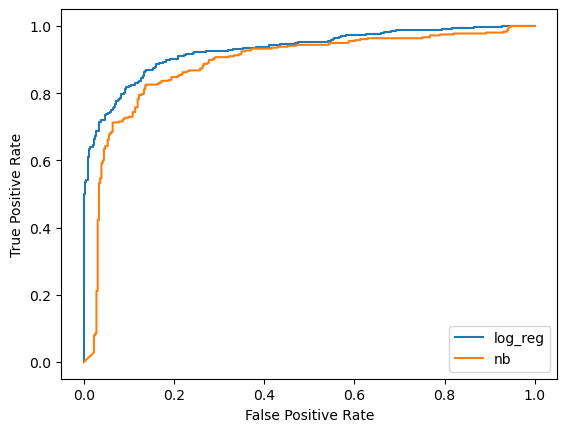

In [116]:
#now let's plot both models on the same plot so we can see how they compare
import matplotlib.pyplot as plt
plt.plot(fpr,tpr, label='log_reg')
plt.plot(fpr_nb,tpr_nb, label='nb')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

Text(0, 0.5, 'recall')

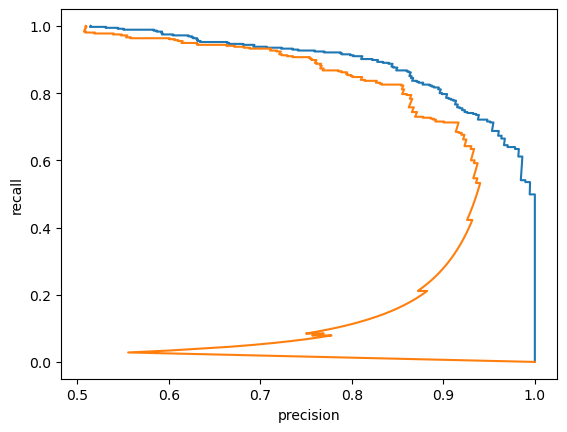

In [117]:
from sklearn.metrics import precision_recall_curve

precision_log,recall_log,thresholds = precision_recall_curve(y_test, yhat_log[:,1])
precision_nb,recall_nb,thresholds_nb = precision_recall_curve(y_test, yhat_nb[:,1])
plt.plot(precision_log,recall_log)
plt.plot(precision_nb,recall_nb, label='nb')
plt.xlabel("precision")
plt.ylabel("recall")

 logistic is a lot better than nb from precision and recall curve, also roc curve, then see it compare to KNN
 I use F1 to compare for classfication models

In [119]:
print("knn F1: ", f1_score(y_test,yhat_knn))
print("knn precision: ", precision_score(y_test,yhat_knn))
print("knn recall: ", recall_score(y_test,yhat_knn))
print("knn accuracy: ", accuracy_score(y_test,yhat_knn))

knn F1:  0.7631578947368421
knn precision:  0.9169960474308301
knn recall:  0.6535211267605634
knn accuracy:  0.7988826815642458


In [120]:
print("log F1: ", f1_score(y_test,yhat_log1))
print("log precision: ", precision_score(y_test,yhat_log1))
print("log recall: ", recall_score(y_test,yhat_log1))
print("log accuracy: ", accuracy_score(y_test,yhat_log1))

log F1:  0.8623595505617978
log precision:  0.8599439775910365
log recall:  0.8647887323943662
log accuracy:  0.8631284916201117


In [121]:
# tune knn
i= 1
accuracy_list=[]
while i < 15:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    accuracy_list.append(accuracy_score(y_test,pred))
    i=i+1

In [122]:
accuracy_list

[0.7932960893854749,
 0.7486033519553073,
 0.8058659217877095,
 0.7653631284916201,
 0.7988826815642458,
 0.776536312849162,
 0.7988826815642458,
 0.776536312849162,
 0.7821229050279329,
 0.7779329608938548,
 0.7905027932960894,
 0.776536312849162,
 0.7946927374301676,
 0.7793296089385475]

In [129]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

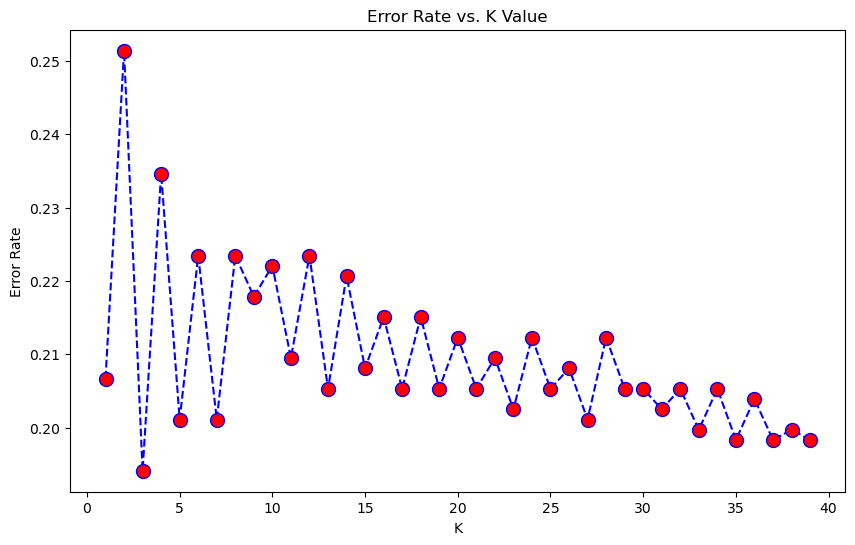

In [133]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
# the low error rate means the model is better

In [ ]:
# 3 neigbour is the highest for knn however it is still doesn't out perform logistic

<AxesSubplot:>

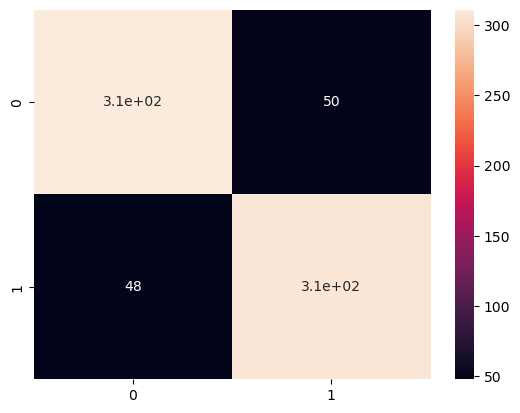

In [125]:
sns.heatmap(confusion_matrix(y_test,yhat_log1),annot=True) # with  data the info is very accurate

## From F1 score, clearly Logistic has a higher F1 which is more accurate will use it to see feature important

# COEFFICIENT IMPROTANCE? 1.	What are the drivers of attrition?
**OT is yes** are affecting the attrition,  then are **years at company**, **years since last promtion** and **num companines worked**,  jobs like **Sales representive** have a high attrition

In [ ]:
# it could reach the highest 80% for KNN clearly the Logistic is better, will check feature importance for logistic

In [124]:
coef_table = pd.DataFrame(list(X.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",log.coef_.transpose())
coef_table.sort_values(by = ["Coefs"],ascending = False)

,0,Coefs
17,YearsSinceLastPromotion,0.872590
15,YearsAtCompany,0.850499
41,OT_Yes,0.830911
37,JR_Sales Representative,0.620614
7,MonthlyIncome($),0.575875
8,NumCompaniesWorked#,0.570820
2,DistanceFromHome,0.509536
40,Mstatus_Single,0.435984
31,JR_Laboratory Technician,0.416763
11,StockOptionLevel,0.391636


### Decision Tree

In [134]:
# Will do a decision tree to see if it is still the case
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [136]:
predictions = dtree.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81       361
           1       0.79      0.84      0.82       355

    accuracy                           0.81       716
   macro avg       0.81      0.81      0.81       716
weighted avg       0.81      0.81      0.81       716

[[282  79]
 [ 56 299]]


In [142]:
#could not outperform f1 in term of f1 score, will check on  prune trees, with 12 min sample split it is a bit better
d1tree = DecisionTreeClassifier(min_samples_split = 12) 
d1tree.fit(x_train,y_train)
predictions = d1tree.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       361
           1       0.82      0.84      0.83       355

    accuracy                           0.83       716
   macro avg       0.83      0.83      0.83       716
weighted avg       0.83      0.83      0.83       716

[[297  64]
 [ 57 298]]


In [149]:
path = dtree.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

In [153]:
ccp_alphas

array([0.        , 0.00011455, 0.00011953, 0.0001654 , 0.00020174,
       0.00023202, 0.00024965, 0.00032982, 0.0004993 , 0.00054923,
       0.00057471, 0.0006404 , 0.00065742, 0.0007367 , 0.0007682 ,
       0.00086546, 0.00096665, 0.00101589, 0.00102835, 0.00105652,
       0.00105696, 0.00108202, 0.00109662, 0.00111568, 0.00114622,
       0.00116679, 0.00117283, 0.00119559, 0.00124553, 0.00125753,
       0.00135649, 0.00142023, 0.00142023, 0.00143799, 0.00145094,
       0.00161377, 0.00164158, 0.00166382, 0.001701  , 0.00195828,
       0.00199566, 0.00203821, 0.00209243, 0.0021076 , 0.00215698,
       0.00230127, 0.00234782, 0.00249501, 0.0024965 , 0.00255642,
       0.00257292, 0.00269102, 0.00274413, 0.00312757, 0.00351883,
       0.00359467, 0.00360254, 0.00387451, 0.00388256, 0.00391184,
       0.00440647, 0.00446743, 0.00499221, 0.00572922, 0.0064147 ,
       0.0084351 , 0.00971219, 0.00988292, 0.01021001, 0.01339251,
       0.01383632, 0.02346609, 0.03486817])

In [151]:
clf_dts = [] # create an array that we will put decision trees into

## now create one decision tree per value for alpha and store it in the array
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    dt.fit(x_train, y_train)
    clf_dts.append(dt)

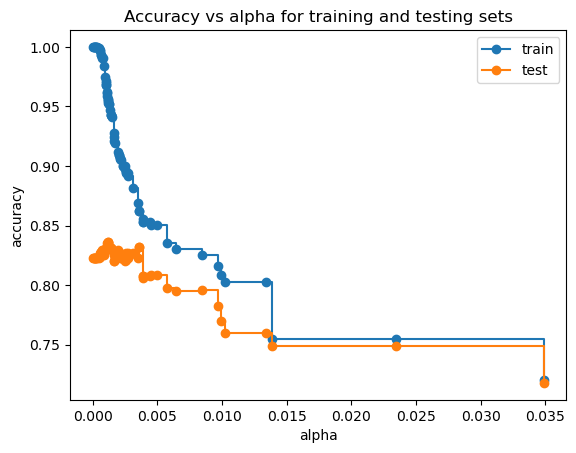

In [152]:
train_scores = [dt.score(x_train, y_train) for dt in clf_dts]
test_scores = [dt.score(x_test, y_test) for dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [154]:
##Will visual the tree to see important vectors
# plot decision tree after pruning - much simpler!
dt = DecisionTreeClassifier(random_state = 0, ccp_alpha=0.013)
dt = dt.fit(x_train,y_train)

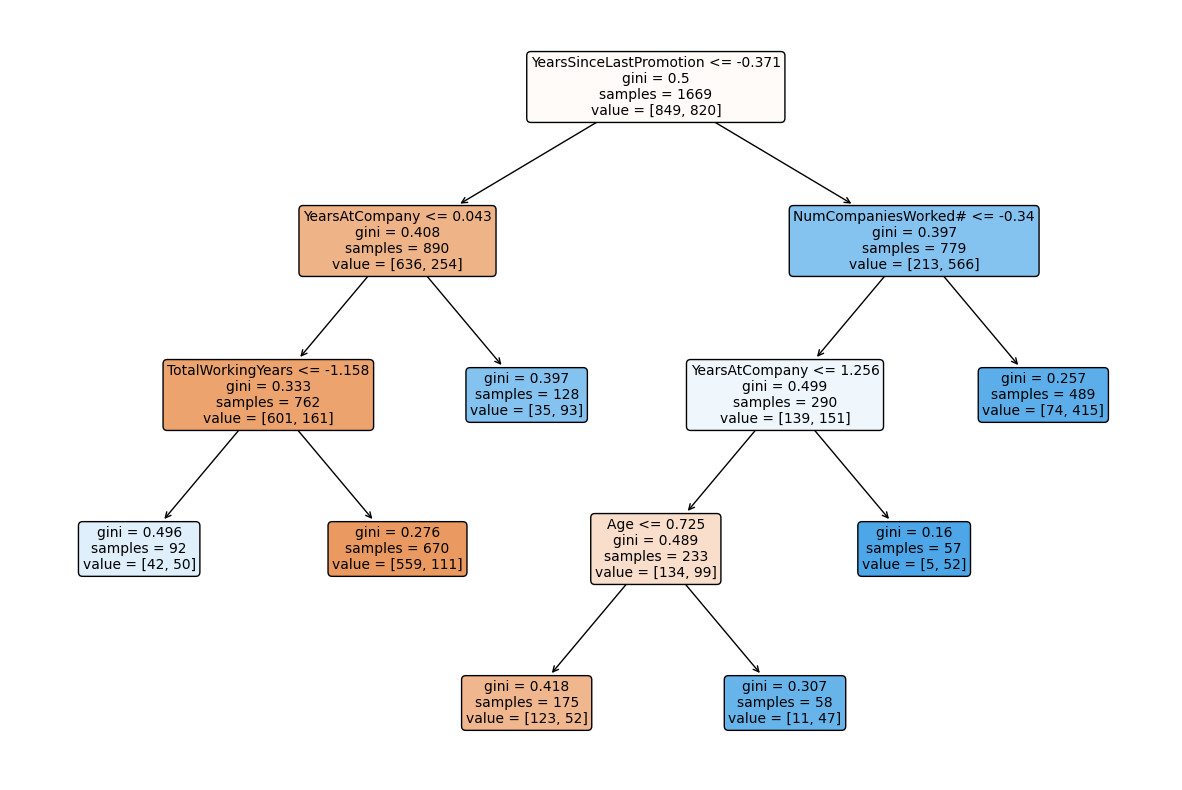

In [156]:
plt.figure(figsize = (15,10))
plot_tree(dt,feature_names =X.columns, filled=True, rounded=True);

## comment: the debision is not clear with  less leaf decision tree

In [157]:
predictions = dt.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions)) #the prediction with tuned is not very good

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       361
           1       0.76      0.75      0.76       355

    accuracy                           0.76       716
   macro avg       0.76      0.76      0.76       716
weighted avg       0.76      0.76      0.76       716

[[276  85]
 [ 87 268]]


## run ramdom forest to see if it is better

In [159]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[336  25]
 [ 48 307]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       361
           1       0.92      0.86      0.89       355

    accuracy                           0.90       716
   macro avg       0.90      0.90      0.90       716
weighted avg       0.90      0.90      0.90       716



In [ ]:
# from here random forest so far give the best prediction score

In [175]:
feature_list = [X.columns]

In [177]:
feature_list

[Index(['Age', 'DailyRate($)', 'DistanceFromHome', 'Education',
        'EnvironmentSatisfaction', 'JobLevel', 'JobSatisfaction',
        'MonthlyIncome($)', 'NumCompaniesWorked#', 'PercentSalaryHike',
        'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
        'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
        'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
        'BT_Non-Travel', 'BT_Travel_Frequently', 'BT_Travel_Rarely',
        'EF_Human Resources', 'EF_Life Sciences', 'EF_Marketing', 'EF_Medical',
        'EF_Other', 'EF_Technical Degree', 'G_Male',
        'JR_Healthcare Representative', 'JR_Human Resources',
        'JR_Laboratory Technician', 'JR_Manager', 'JR_Manufacturing Director',
        'JR_Research Director', 'JR_Research Scientist', 'JR_Sales Executive',
        'JR_Sales Representative', 'Mstatus_Divorced', 'Mstatus_Married',
        'Mstatus_Single', 'OT_Yes'],
       dtype='object')]

In [189]:
# Get numerical feature importances

coef_table = pd.DataFrame(list(X.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",rfc.feature_importances_.transpose())
coef_table.sort_values(by = ["Coefs"],ascending = False)

,0,Coefs
15,YearsAtCompany,0.109424
17,YearsSinceLastPromotion,0.099376
16,YearsInCurrentRole,0.064734
12,TotalWorkingYears,0.061121
2,DistanceFromHome,0.059776
18,YearsWithCurrManager,0.056100
7,MonthlyIncome($),0.051315
0,Age,0.044380
8,NumCompaniesWorked#,0.040066
41,OT_Yes,0.037822


In [184]:
feature_importances

[(Index(['Age', 'DailyRate($)', 'DistanceFromHome', 'Education',
         'EnvironmentSatisfaction', 'JobLevel', 'JobSatisfaction',
         'MonthlyIncome($)', 'NumCompaniesWorked#', 'PercentSalaryHike',
         'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
         'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
         'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
         'BT_Non-Travel', 'BT_Travel_Frequently', 'BT_Travel_Rarely',
         'EF_Human Resources', 'EF_Life Sciences', 'EF_Marketing', 'EF_Medical',
         'EF_Other', 'EF_Technical Degree', 'G_Male',
         'JR_Healthcare Representative', 'JR_Human Resources',
         'JR_Laboratory Technician', 'JR_Manager', 'JR_Manufacturing Director',
         'JR_Research Director', 'JR_Research Scientist', 'JR_Sales Executive',
         'JR_Sales Representative', 'Mstatus_Divorced', 'Mstatus_Married',
         'Mstatus_Single', 'OT_Yes'],
        dtype='object'),
  0.0

# Lastly I will build the SVM 

In [161]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(x_train,y_train)

SVC()

use gridsearch to find the best hyperparameter for SVM, Grid search compare each model thus it is the best

In [162]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.2s
[CV] END .....................................C=0.1, gamma=1; total time=   0.2s
[CV] END .....................................C=0.1, gamma=1; total time=   0.2s
[CV] END .....................................C=0.1, gamma=1; total time=   0.2s
[CV] END .....................................C=0.1, gamma=1; total time=   0.2s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.2s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.2s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.2s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.2s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.2s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.1s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [163]:
grid_predictions = grid.predict(x_test)

In [164]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       361
           1       0.89      0.87      0.88       355

    accuracy                           0.88       716
   macro avg       0.88      0.88      0.88       716
weighted avg       0.88      0.88      0.88       716



In [171]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10, 'gamma': 0.01}


 SVM could not beat the Random forest

### Model building part conclusion:  F1 score is used to compared models since it is category classfication , 
<br> logistic regression has a F1 score of 86%, <br>SVM has F1 score of 88% with c = 10 and gamma = 0.01 <br> with Random forest it could reach 90%, so **Random forest** is the best model

# Conclusion
# 1. business Case
Two questions are asked from the bussiness side I will answer the question first
1.	What are the drivers of attrition?
**OT is yes** are affecting the attrition,  then are **years at company**, **years since last promtion** and **num companines worked**,  jobs like **Sales representive** have a high attrition ,which is found from coefficient of logistic regression coefficient, with high positivie values, it means the key driver of attrition <br>
 <br>
2.	Can we predict if an employee will leave the company? <br>

I think with a predicition rate of 90 could say that we could predict whether an employee will leave the company.

## 2. Recommendation
I think the company should give old employees(interms of year worked at company) more benefits and promotions because with their expirences they could pursue a better job that's why they choose to leave their original company and it is also because of no promotion after a long time working with the employee.  in addition, over time shoudl be cancelled from the company those with over time have to put more time on work that's why they are all leaving to find a balance life. <br>
Jobs with high turnover rate such as sales representitive should be treat better they have a low monthly income maybe increase in salary will keep them